<div style="text-align:center"><h1><font color=#99qt99>CASE STUDY</font> </h1></div>
<div style="text-align:center"><h1><font color=#qt99qt>NETWORKING NETWORK INTRUSION DETECTION</font> </h1></div>
<hr color=#99qt99, style='height:5px'>

> - In this we check about Malware attack using 2 method:
    * 1:  Binomial Classification: Activity is normal or attack
    * 2:  Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R

In [5]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



import warnings

<div style="text-align:center"><h2><font color=#99qt99> 1. Binomial</font></h2></div>

#### Import <font color=#xyzdef>Train Data</font>

In [123]:
address = 'NSL_Dataset/train.txt'
train = pd.read_csv(address, delimiter=',', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [124]:
len(train)

125973

In [8]:
train.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", 
"wrong_fragment","urgent","hot","num_failed_logins","logged_in", 
"num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
"num_shells","num_access_files","num_outbound_cmds","is_host_login", 
"is_guest_login","count","srv_count","serror_rate",  "srv_serror_rate", 
"rerror_rate","srv_rerror_rate","same_srv_rate",  "diff_srv_rate", 
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", 
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack",  "last_flag"]
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [6]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(train)

In [12]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
num_var = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
           'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
           'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 
           'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
# Binary attack
cat_var = ['protocol_type','service', 'flag']

In [14]:
print(num_var,'\n')
print('num_var Size: ',  len(num_var))

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag'] 

num_var Size:  33


In [15]:
print(cat_var)
print('cat_var Size: ', len(cat_var))

['protocol_type', 'service', 'flag']
cat_var Size:  3


In [16]:
train_num = train[num_var]
train_cat = train[cat_var]

In [17]:
print('train_num.shape: ', train_num.shape)
print('train_cat.shape: ', train_cat.shape)

train_num.shape:  (125973, 33)
train_cat.shape:  (125973, 3)


### <font color=#qt99qt>Create Dummy for categorical Variable</font>

In [18]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df


for c_feature in train_cat.columns:
    train_cat = create_dummies( train_cat, c_feature )

In [19]:
print('With Dummy train_cat.shape: ',  train_cat.shape)

With Dummy train_cat.shape:  (125973, 81)


In [20]:
cat = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

In [21]:
Binary_train = train.copy()

In [22]:
Binary_train['Binary_attack'] = Binary_train.attack.eq('normal').view('i1')
Binary_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,Binary_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1


In [23]:
train_cat = pd.concat([train_cat, Binary_train[cat], Binary_train['Binary_attack']], axis=1)

In [24]:
Binary_train.drop(['attack'], axis=1, inplace= True)

In [25]:
feature = train_cat.columns.difference(['Binary_attack'])

In [26]:
import scipy.stats as stats

In [27]:
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in feature:
    cross_tab = pd.crosstab(train_cat[cat_variable],train_cat['Binary_attack'], margins=False)
    # print(cross_tab)
    # stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable, stats.chi2_contingency(observed=cross_tab)[0], stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    # print(temp)
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
# print(cross_tab, '\n')
# print(temp, '\n')
print(chisq_df, '\n')

              Variable   ChiSquare       P-Value
0             flag_REJ     4307.75             0
1            flag_RSTO     987.103  1.14218e-216
2          flag_RSTOS0     116.263    4.1626e-27
3            flag_RSTR     2229.72             0
4              flag_S0     53254.4             0
5              flag_S1     302.038   1.18514e-67
6              flag_S2     81.1363   2.10679e-19
7              flag_S3     27.4964   1.57387e-07
8              flag_SF     72049.5             0
9              flag_SH     301.271   1.74123e-67
10      is_guest_login     193.542   5.36023e-44
11       is_host_login  0.00480692      0.944725
12                land     5.53046     0.0186882
13           logged_in     60002.6             0
14   protocol_type_tcp     355.273   3.01278e-79
15   protocol_type_udp     5940.68             0
16          root_shell     50.7325   1.05854e-12
17         service_X11     41.5874    1.1272e-10
18      service_Z39_50     994.761   2.4717e-218
19         service_a

In [28]:
chisq_df = chisq_df.sort_values(by = 'P-Value').reset_index(drop=True)

In [29]:
chisq_df

,Variable,ChiSquare,P-Value
0,flag_REJ,4307.75,0
1,service_eco_i,3473.01,0
2,service_ecr_i,2832.24,0
3,service_http,39829.6,0
4,protocol_type_udp,5940.68,0
5,logged_in,60002.6,0
6,flag_SF,72049.5,0
7,service_domain_u,8443.62,0
8,service_private,25475.4,0
9,flag_S0,53254.4,0


In [30]:
list(chisq_df['Variable'])[0:10]

['flag_REJ',
 'service_eco_i',
 'service_ecr_i',
 'service_http',
 'protocol_type_udp',
 'logged_in',
 'flag_SF',
 'service_domain_u',
 'service_private',
 'flag_S0']

In [31]:
chisq = list(chisq_df['Variable'])[0:10]
train_cat_data = train_cat[chisq]
print(train_cat_data.shape)
train_cat_data.head()

(125973, 10)


,flag_REJ,service_eco_i,service_ecr_i,service_http,protocol_type_udp,logged_in,flag_SF,service_domain_u,service_private,flag_S0
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0
4,0,0,0,1,0,1,1,0,0,0


In [32]:
## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_var:
    tstats = stats.ttest_ind(Binary_train[Binary_train['Binary_attack']==1][num_variable],Binary_train[Binary_train['Binary_attack']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df.shape)
tstats_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


(33, 3)


,Variable Name,T-Statistic,P-Value
0,duration,-17.3357,3.02785e-67
1,src_bytes,-2.10166,0.0355854
2,dst_bytes,-1.46142,0.143902
3,wrong_fragment,-34.1968,4.02447e-255
4,urgent,0.989188,0.322573


In [33]:
tstats_df = tstats_df.sort_values(by = 'P-Value').reset_index().head(20)
tstats_df

,index,Variable Name,T-Statistic,P-Value
0,16,srv_serror_rate,-302.2,0
1,30,dst_host_rerror_rate,-92.644,0
2,29,dst_host_srv_serror_rate,-307.646,0
3,28,dst_host_serror_rate,-305.074,0
4,25,dst_host_diff_srv_rate,-88.8718,0
5,24,dst_host_same_srv_rate,341.932,0
6,23,dst_host_srv_count,370.942,0
7,22,dst_host_count,-143.597,0
8,21,srv_diff_host_rate,42.675,0
9,20,diff_srv_rate,-73.8312,0


In [34]:
train_num_data = list(tstats_df['Variable Name'])[0:20]
train_num_data = train_num[train_num_data]

In [35]:
print(train_num_data.shape)
train_num_data.head()

(125973, 20)


,srv_serror_rate,dst_host_rerror_rate,dst_host_srv_serror_rate,dst_host_serror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_count,srv_diff_host_rate,diff_srv_rate,same_srv_rate,srv_rerror_rate,rerror_rate,dst_host_srv_rerror_rate,last_flag,count,serror_rate,wrong_fragment,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.05,0.00,0.00,0.03,0.17,25,150,0.00,0.00,1.00,0.0,0.0,0.00,20,2,0.0,0,0.17,0.00
1,0.0,0.00,0.00,0.00,0.60,0.00,1,255,0.00,0.15,0.08,0.0,0.0,0.00,15,13,0.0,0,0.88,0.00
2,1.0,0.00,1.00,1.00,0.05,0.10,26,255,0.00,0.07,0.05,0.0,0.0,0.00,19,123,1.0,0,0.00,0.00
3,0.2,0.00,0.01,0.03,0.00,1.00,255,30,0.00,0.00,1.00,0.0,0.0,0.01,21,5,0.2,0,0.03,0.04
4,0.0,0.00,0.00,0.00,0.00,1.00,255,255,0.09,0.00,1.00,0.0,0.0,0.00,21,30,0.0,0,0.00,0.00


In [164]:
Binary_train = pd.concat([train_num_data, train_cat_data, Binary_train['Binary_attack']],axis=1)
Binary_train.head()

,srv_serror_rate,dst_host_rerror_rate,dst_host_srv_serror_rate,dst_host_serror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_count,srv_diff_host_rate,diff_srv_rate,...,service_eco_i,service_ecr_i,service_http,protocol_type_udp,logged_in,flag_SF,service_domain_u,service_private,flag_S0,Binary_attack
0,0.0,0.05,0.00,0.00,0.03,0.17,25,150,0.00,0.00,...,0,0,0,0,0,1,0,0,0,1
1,0.0,0.00,0.00,0.00,0.60,0.00,1,255,0.00,0.15,...,0,0,0,1,0,1,0,0,0,1
2,1.0,0.00,1.00,1.00,0.05,0.10,26,255,0.00,0.07,...,0,0,0,0,0,0,0,1,1,0
3,0.2,0.00,0.01,0.03,0.00,1.00,255,30,0.00,0.00,...,0,0,1,0,1,1,0,0,0,1
4,0.0,0.00,0.00,0.00,0.00,1.00,255,255,0.09,0.00,...,0,0,1,0,1,1,0,0,0,1


In [38]:
Binary_train.isnull().any().sum()

0

##  <font color=#qt99qt>Model create</font>

In [165]:
feature = Binary_train.columns.difference(['Binary_attack'])

In [166]:
train_X, test_X , train_y, test_y = train_test_split(Binary_train[feature],
                                                     Binary_train['Binary_attack'], 
                                                     test_size = 0.3,
                                                     random_state = 123)
print(len(train_X), len(train_y), len(test_X), len(test_y))

88181 88181 37792 37792


In [168]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
logreg.coef_[0]

array([-0.01063722,  1.73608407, -0.01307425, -1.98855451, -2.5546198 ,
       -3.05355492, -1.48376745,  0.12721373,  0.01133599, -2.55367318,
       -1.4514989 , -0.99780404,  1.28918087, -5.33633049, -2.77438273,
        0.70532095, -0.63938099,  2.14064467, -1.69277643,  3.43898395,
       -1.19982599,  1.86705543, -4.15908503, -4.50676178, -1.40658794,
       -5.14587965, -1.7802125 , -2.44193621, -2.45633415, -2.1100304 ])

In [44]:
list(zip( feature, logreg.coef_[0]))

[('count', -0.010637222006221678),
 ('diff_srv_rate', 1.736084067040212),
 ('dst_host_count', -0.013074250507755781),
 ('dst_host_diff_srv_rate', -1.9885545052004432),
 ('dst_host_rerror_rate', -2.5546198023451083),
 ('dst_host_same_src_port_rate', -3.0535549236457085),
 ('dst_host_same_srv_rate', -1.4837674545317556),
 ('dst_host_serror_rate', 0.1272137322892528),
 ('dst_host_srv_count', 0.011335992365996195),
 ('dst_host_srv_diff_host_rate', -2.5536731755263022),
 ('dst_host_srv_rerror_rate', -1.4514989033475039),
 ('dst_host_srv_serror_rate', -0.9978040394759828),
 ('flag_REJ', 1.2891808706624572),
 ('flag_S0', -5.336330485867562),
 ('flag_SF', -2.7743827306910362),
 ('last_flag', 0.7053209466522439),
 ('logged_in', -0.6393809910298651),
 ('protocol_type_udp', 2.1406446725909056),
 ('rerror_rate', -1.692776429149254),
 ('same_srv_rate', 3.4389839542908),
 ('serror_rate', -1.1998259931789963),
 ('service_domain_u', 1.8670554304106217),
 ('service_eco_i', -4.159085030843297),
 ('servi

In [170]:
y_pred = logreg.predict( train_X )
len(y_pred)

88181

In [45]:
#Predicting the test cases
Net_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_X ) } )
print(len(Net_train_pred))
Net_train_pred.sample(5)

88181


,actual,predicted
92263,0,0
99197,0,0
35355,1,1
1728,1,1
70109,1,1


In [46]:
Net_test_pred = pd.DataFrame({'actual': test_y,
                             'predicted': logreg.predict(test_X)})
print(len(Net_test_pred))
Net_test_pred.sample(5)

37792


,actual,predicted
94385,1,1
14852,0,0
97030,0,0
972,1,1
117546,0,0


In [47]:
print(Net_train_pred.predicted.unique())
print(Net_test_pred.predicted.unique())

[0 1]
[1 0]


In [48]:
# Creating a confusion matrix

from sklearn import metrics


cm_train = metrics.confusion_matrix( Net_train_pred.actual,
                            Net_train_pred.predicted, [1,0] )
print('cm_train: \n',cm_train)


cm_test = metrics.confusion_matrix( Net_test_pred.actual,
                            Net_test_pred.predicted, [1,0] )
print('cm_test: \n',cm_test)

cm_train: 
 [[46441   740]
 [  505 40495]]
cm_test: 
 [[19817   345]
 [  245 17385]]


In [49]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 1.0, 'Train Predicted Data')

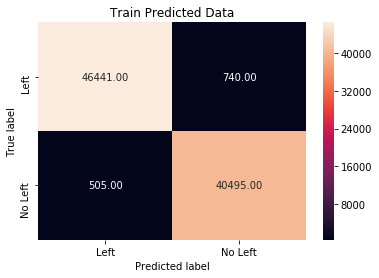

In [50]:
sn.heatmap(cm_train, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Train Predicted Data')


Text(0.5, 1.0, 'Test Predicted Data')

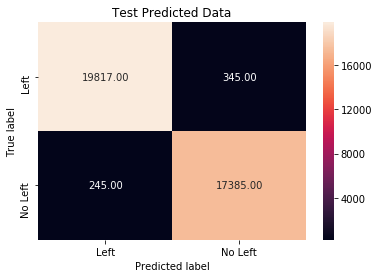

In [51]:
sn.heatmap(cm_test, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Test Predicted Data')

In [52]:
train_score = metrics.accuracy_score( Net_train_pred.actual, Net_train_pred.predicted )
round( float(train_score), 2 )

0.99

In [53]:
test_score = metrics.accuracy_score( Net_test_pred.actual, Net_test_pred.predicted )
round( float(test_score), 2 )

0.98

In [54]:
train_actual=train_y.reset_index()
train_actual.drop('index',axis=1,inplace=True)
train_actual.sample(5)

,Binary_attack
17916,0
76775,1
88015,0
45438,1
60174,0


In [55]:
test_actual=test_y.reset_index()
test_actual.drop('index',axis=1,inplace=True)
test_actual.sample(5)

,Binary_attack
18190,1
5806,0
3610,0
15781,0
3353,1


In [56]:
train_predicted_prob = pd.DataFrame(logreg.predict_proba(train_X))[[1]]
train_predicted_prob.head()

,1
0,0.000002
1,0.937053
2,0.002743
3,0.476605
4,0.000799


In [57]:
test_predicted_prob = pd.DataFrame(logreg.predict_proba(test_X))[[1]]
test_predicted_prob.head()

,1
0,0.999875
1,0.003957
2,0.157542
3,0.001090
4,0.968379


In [58]:
train_predicted_prob = pd.DataFrame(logreg.predict_proba(train_X))[[1]]
train_predicted_prob.columns = ['prob']
actual=train_y.reset_index()
actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
Net_train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
Net_train_predict.columns = ['actual','prob']
Net_train_predict.head()

,actual,prob
0,0,0.000002
1,1,0.937053
2,0,0.002743
3,0,0.476605
4,0,0.000799


In [59]:
test_predicted_prob = pd.DataFrame(logreg.predict_proba(test_X))[[1]]
test_predicted_prob.columns = ['prob']
actual=test_y.reset_index()
actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
Net_test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
Net_test_predict.columns = ['actual','prob']
Net_test_predict.head()

,actual,prob
0,1,0.999875
1,0,0.003957
2,0,0.157542
3,0,0.001090
4,1,0.968379


In [60]:
train_roc_like_df = pd.DataFrame()
train_temp = Net_train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    train_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    train_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    train_roc_like_df = pd.concat([train_roc_like_df, train_roc_like_table], axis=0)

In [61]:
test_roc_like_df = pd.DataFrame()
test_temp = Net_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

In [62]:
train_roc_like_df.head()

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.997669,0.822902
0,0.040816,0.996990,0.886634
0,0.061224,0.996439,0.912854
0,0.081633,0.995549,0.928317


In [63]:
test_roc_like_df.head()

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.997272,0.827737
0,0.040816,0.996479,0.890471
0,0.061224,0.995685,0.916222
0,0.081633,0.994643,0.930403


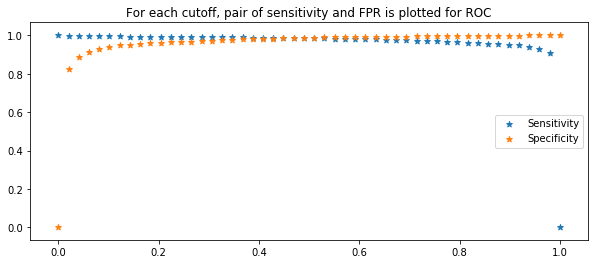

In [64]:
### train_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(train_roc_like_df['cutoff'], train_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(train_roc_like_df['cutoff'], train_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()


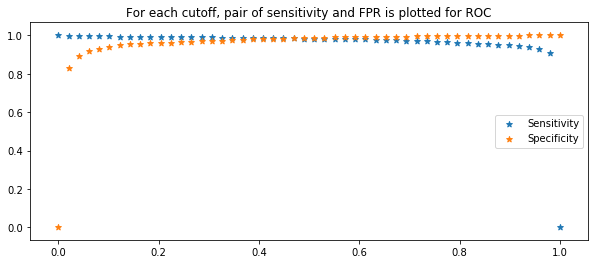

In [65]:
### test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()


In [66]:
## Finding ideal cut-off for checking if this remains same in OOS validation for Train Data
train_roc_like_df['total'] = train_roc_like_df['sensitivity'] + train_roc_like_df['specificity']
train_roc_like_df[train_roc_like_df['total']==train_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.55102,0.982832,0.990049,1.972881


In [67]:
## Finding ideal cut-off for checking if this remains same in OOS validation for Test Data
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.55102,0.981252,0.989563,1.970815


In [68]:
Net_train_predict['predicted'] = Net_train_predict['prob'].apply(lambda x: 1 if x > 0.55102 else 0)
Net_train_predict.head()

,actual,prob,predicted
0,0,0.000002,0
1,1,0.937053,1
2,0,0.002743,0
3,0,0.476605,0
4,0,0.000799,0


In [128]:
Net_test_predict['predicted'] = Net_test_predict['prob'].apply(lambda x: 1 if x > 0.55102 else 0)
Net_test_predict.head()

,actual,prob,predicted
0,1,0.999875,1
1,0,0.003957,0
2,0,0.157542,0
3,0,0.001090,0
4,1,0.968379,1


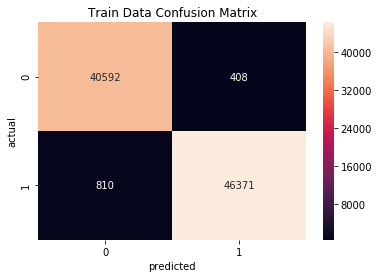

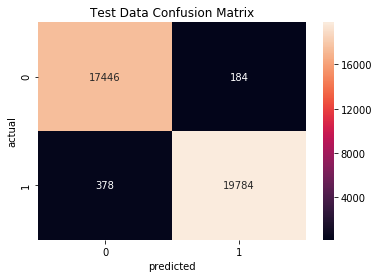

In [70]:
sn.heatmap(pd.crosstab(Net_train_predict['actual'], Net_train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()

sn.heatmap(pd.crosstab(Net_test_predict['actual'], Net_test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [72]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.000125,0.999875
1,0.996043,0.003957
2,0.842458,0.157542
3,0.998910,0.001090
4,0.031621,0.968379


In [130]:
Net_test_pred = pd.concat( [Net_test_predict, predict_proba_df], axis = 1 )

In [131]:
Net_test_pred.head()

,actual,prob,predicted,0,1
0,1,0.999875,1,0.000125,0.999875
1,0,0.003957,0,0.996043,0.003957
2,0,0.157542,0,0.842458,0.157542
3,0,0.001090,0,0.998910,0.001090
4,1,0.968379,1,0.031621,0.968379


In [78]:
auc_score = metrics.roc_auc_score( Net_train_pred.actual, Net_train_pred.predicted  )
round( float( auc_score ), 2 )

0.99

In [132]:
auc_score = metrics.roc_auc_score( Net_test_pred.actual, Net_test_pred.predicted  )
auc_score 

0.9854075522020922

# <font color=#zzbb99>Now work on Original Test Data</font>

In [197]:
address2 = 'NSL_Dataset/test.txt'
network_test = pd.read_csv(address2, delimiter=',', header=None)

In [198]:
test = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", 
"wrong_fragment","urgent","hot","num_failed_logins","logged_in", 
"num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
"num_shells","num_access_files","num_outbound_cmds","is_host_login", 
"is_guest_login","count","srv_count","serror_rate",  "srv_serror_rate", 
"rerror_rate","srv_rerror_rate","same_srv_rate",  "diff_srv_rate", 
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", 
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack",  "last_flag"]
network_test.columns = test
network_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [199]:
network_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [201]:
len(network_test)

22544

In [200]:
num_var = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
           'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
           'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 
           'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
# Binary attack
cat_var = ['protocol_type','service', 'flag']

In [202]:
print(num_var,'\n')
print('num_var Size: ',  len(num_var))

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag'] 

num_var Size:  33


In [204]:
print(cat_var)
print('cat_var Size: ', len(cat_var))

['protocol_type', 'service', 'flag']
cat_var Size:  3


In [207]:
test_num = network_test[num_var]
test_cat = network_test[cat_var]

In [208]:
print('train_num.shape: ', test_num.shape)
print('train_cat.shape: ', test_cat.shape)

train_num.shape:  (22544, 33)
train_cat.shape:  (22544, 3)


### <font color=#qt99qt>Create Dummy for categorical Variable</font>

In [209]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df


for c_feature in test_cat.columns:
    test_cat = create_dummies( test_cat, c_feature )

In [210]:
print('With Dummy train_cat.shape: ',  test_cat.shape)

With Dummy train_cat.shape:  (22544, 75)


In [211]:
cat = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

In [241]:
Binary_test = network_test.copy()

In [242]:
Binary_test['Binary_attack'] = network_test.attack.eq('normal').view('i1')
Binary_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,Binary_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,1
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,0


In [238]:
test_cat = pd.concat([test_cat, Binary_test[cat], Binary_test['Binary_attack']], axis=1)

In [243]:
Binary_test.drop(['attack'], axis=1, inplace= True)
Binary_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Binary_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,1
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,0


In [219]:
feature = test_cat.columns.difference(['Binary_attack'])

In [220]:
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in feature:
    cross_tab = pd.crosstab(test_cat[cat_variable],test_cat['Binary_attack'], margins=False)
    # print(cross_tab)
    # stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable, stats.chi2_contingency(observed=cross_tab)[0], stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    # print(temp)
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
# print(cross_tab, '\n')
# print(temp, '\n')
print(chisq_df, '\n')

               Variable  ChiSquare       P-Value
0              flag_REJ    3368.72             0
1             flag_RSTO    596.653  8.94954e-132
2           flag_RSTOS0   0.266521      0.605675
3             flag_RSTR     373.04   4.07704e-83
4               flag_S0     1670.7             0
5               flag_S1   0.410996      0.521464
6               flag_S2    0.29349      0.587992
7               flag_S3    174.876   6.37146e-40
8               flag_SF    8247.61             0
9               flag_SH    53.6717   2.36956e-13
10       is_guest_login    351.297   2.21115e-78
11        is_host_login    6.66315    0.00984269
12                 land    3.68712     0.0548342
13            logged_in    6846.09             0
14    protocol_type_tcp    111.931   3.69971e-26
15    protocol_type_udp     735.86  4.76525e-162
16           root_shell    2.00347       0.15694
17          service_X11    1.04661       0.30629
18       service_Z39_50     32.383   1.26588e-08
19         service_a

In [221]:
chisq_df = chisq_df.sort_values(by = 'P-Value').reset_index(drop=True)

In [222]:
chisq_df

,Variable,ChiSquare,P-Value
0,flag_REJ,3368.72,0
1,flag_S0,1670.7,0
2,service_private,1570.86,0
3,flag_SF,8247.61,0
4,service_http,8624.67,0
5,logged_in,6846.09,0
6,service_domain_u,1218.14,6.96478e-267
7,service_telnet,1162.92,6.96924e-255
8,service_pop_3,776.628,6.51264e-171
9,protocol_type_udp,735.86,4.76525e-162


In [223]:
list(chisq_df['Variable'])[0:10]

['flag_REJ',
 'flag_S0',
 'service_private',
 'flag_SF',
 'service_http',
 'logged_in',
 'service_domain_u',
 'service_telnet',
 'service_pop_3',
 'protocol_type_udp']

In [224]:
chisq = list(chisq_df['Variable'])[0:10]
test_cat_data = test_cat[chisq]
print(test_cat_data.shape)
test_cat_data.head()

(22544, 10)


,flag_REJ,flag_S0,service_private,flag_SF,service_http,logged_in,service_domain_u,service_telnet,service_pop_3,protocol_type_udp
0,1,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [244]:
## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_var:
    tstats = stats.ttest_ind(Binary_test[Binary_test['Binary_attack']==1][num_variable],Binary_test[Binary_test['Binary_attack']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df.shape)
tstats_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


(33, 3)


,Variable Name,T-Statistic,P-Value
0,duration,-16.0357,1.49866e-57
1,src_bytes,-2.17295,0.0297945
2,dst_bytes,13.0308,1.12808e-38
3,wrong_fragment,4.16631,3.10726e-05
4,urgent,-2.54186,0.0110329


In [245]:
tstats_df = tstats_df.sort_values(by = 'P-Value').reset_index().head(20)
tstats_df

,index,Variable Name,T-Statistic,P-Value
0,16,srv_serror_rate,-46.0349,0
1,30,dst_host_rerror_rate,-83.9843,0
2,29,dst_host_srv_serror_rate,-47.2609,0
3,28,dst_host_serror_rate,-47.0044,0
4,25,dst_host_diff_srv_rate,-39.3918,0
5,24,dst_host_same_srv_rate,105.663,0
6,23,dst_host_srv_count,110.671,0
7,22,dst_host_count,-56.4222,0
8,20,diff_srv_rate,-40.2029,0
9,19,same_srv_rate,89.1681,0


In [246]:
test_num_data = list(tstats_df['Variable Name'])[0:20]
test_num_data = test_num[test_num_data]

In [247]:
print(test_num_data.shape)
test_num_data.head()

(22544, 20)


,srv_serror_rate,dst_host_rerror_rate,dst_host_srv_serror_rate,dst_host_serror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_count,diff_srv_rate,same_srv_rate,srv_rerror_rate,rerror_rate,dst_host_srv_rerror_rate,serror_rate,last_flag,count,num_failed_logins,duration,srv_count,dst_bytes
0,0.00,1.00,0.0,0.0,0.06,0.04,10,255,0.06,0.04,1.0,1.0,1.00,0.0,21,229,0,0,10,0
1,0.00,1.00,0.0,0.0,0.06,0.00,1,255,0.06,0.01,1.0,1.0,1.00,0.0,21,136,0,0,1,0
2,0.00,0.00,0.0,0.0,0.04,0.61,86,134,0.00,1.00,0.0,0.0,0.00,0.0,21,1,0,2,1,0
3,0.00,0.00,0.0,0.0,0.00,1.00,57,3,0.00,1.00,0.0,0.0,0.00,0.0,15,1,0,0,65,0
4,0.12,0.83,0.0,0.0,0.17,0.31,86,29,0.00,1.00,0.5,1.0,0.71,0.0,11,1,0,1,8,15


In [248]:
Binary_test = pd.concat([test_num_data, test_cat_data, Binary_test['Binary_attack']],axis=1)
Binary_test.head()

,srv_serror_rate,dst_host_rerror_rate,dst_host_srv_serror_rate,dst_host_serror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_count,diff_srv_rate,same_srv_rate,...,flag_S0,service_private,flag_SF,service_http,logged_in,service_domain_u,service_telnet,service_pop_3,protocol_type_udp,Binary_attack
0,0.00,1.00,0.0,0.0,0.06,0.04,10,255,0.06,0.04,...,0,1,0,0,0,0,0,0,0,0
1,0.00,1.00,0.0,0.0,0.06,0.00,1,255,0.06,0.01,...,0,1,0,0,0,0,0,0,0,0
2,0.00,0.00,0.0,0.0,0.04,0.61,86,134,0.00,1.00,...,0,0,1,0,0,0,0,0,0,1
3,0.00,0.00,0.0,0.0,0.00,1.00,57,3,0.00,1.00,...,0,0,1,0,0,0,0,0,0,0
4,0.12,0.83,0.0,0.0,0.17,0.31,86,29,0.00,1.00,...,0,0,0,0,0,0,1,0,0,0


In [249]:
Binary_test.isnull().sum()

srv_serror_rate             0
dst_host_rerror_rate        0
dst_host_srv_serror_rate    0
dst_host_serror_rate        0
dst_host_diff_srv_rate      0
dst_host_same_srv_rate      0
dst_host_srv_count          0
dst_host_count              0
diff_srv_rate               0
same_srv_rate               0
srv_rerror_rate             0
rerror_rate                 0
dst_host_srv_rerror_rate    0
serror_rate                 0
last_flag                   0
count                       0
num_failed_logins           0
duration                    0
srv_count                   0
dst_bytes                   0
flag_REJ                    0
flag_S0                     0
service_private             0
flag_SF                     0
service_http                0
logged_in                   0
service_domain_u            0
service_telnet              0
service_pop_3               0
protocol_type_udp           0
Binary_attack               0
dtype: int64

##  <font color=#qt99qt>Model create</font>

In [250]:
feature = Binary_test.columns.difference(['Binary_attack'])

In [251]:
train_X, test_X , train_y, test_y = train_test_split(Binary_test[feature],
                                                     Binary_test['Binary_attack'], 
                                                     test_size = 0.1,
                                                     random_state = 123)
print(len(train_X), len(train_y), len(test_X), len(test_y))

20289 20289 2255 2255


In [252]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [253]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [254]:
#Predicting the test cases
Net_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_X ) } )
print(len(Net_train_pred))
Net_train_pred.sample(5)

20289


,actual,predicted
10172,1,1
15662,0,0
2328,0,0
5000,1,1
10513,0,0


In [255]:
Net_test_pred = pd.DataFrame({'actual': test_y,
                             'predicted': logreg.predict(test_X)})
print(len(Net_test_pred))
Net_test_pred.sample(5)

2255


,actual,predicted
7281,1,1
1185,0,0
21893,0,0
9307,0,0
1907,0,0


In [256]:
print(Net_train_pred.predicted.unique())
print(Net_test_pred.predicted.unique())

[0 1]
[1 0]


In [257]:
# Creating a confusion matrix

from sklearn import metrics


cm_train = metrics.confusion_matrix( Net_train_pred.actual,
                            Net_train_pred.predicted, [1,0] )
print('cm_train: \n',cm_train)


cm_test = metrics.confusion_matrix( Net_test_pred.actual,
                            Net_test_pred.predicted, [1,0] )
print('cm_test: \n',cm_test)

cm_train: 
 [[ 8239   494]
 [  717 10839]]
cm_test: 
 [[ 909   69]
 [  80 1197]]


In [258]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 1.0, 'Train Predicted Data')

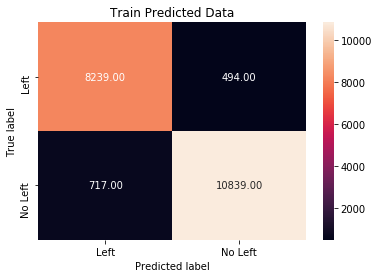

In [259]:
sn.heatmap(cm_train, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Train Predicted Data')


Text(0.5, 1.0, 'Test Predicted Data')

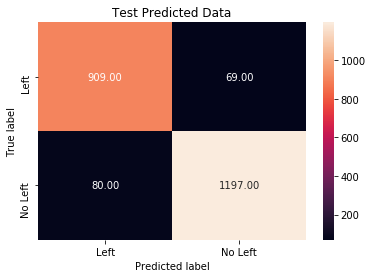

In [260]:
sn.heatmap(cm_test, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Test Predicted Data')

In [261]:
train_score = metrics.accuracy_score( Net_train_pred.actual, Net_train_pred.predicted )
round( float(train_score), 2 )

0.94

In [262]:
test_score = metrics.accuracy_score( Net_test_pred.actual, Net_test_pred.predicted )
round( float(test_score), 2 )

0.93

### <font color=#qwemnb>The differences b/w the accuracy of Both Original <font color=#999zxc>Train Data(0.99) & Test Data(0.94)</font> is 0.5</font>

# <div style="text-align:center"><font color=#qt99qt> 2. Multinomial Classification</font></div>

## <font color=#aaiihh>$2.1: DOS-Attack$</font>

In [105]:
print(train.shape)
train.head()

(125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [109]:
train_num.sample(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
102153,0,0,0,0,0,0,0,0,0,0,...,60,0.24,0.04,0.00,0.00,1.00,1.0,0.0,0.0,19
101295,5,6,0,0,0,0,0,0,0,0,...,1,0.00,0.03,0.00,0.00,0.00,0.0,0.0,0.0,7
88948,0,0,0,0,0,0,0,0,0,0,...,14,0.05,0.07,0.00,0.00,1.00,1.0,0.0,0.0,21
56419,0,0,0,0,0,0,0,0,0,0,...,6,0.02,0.06,0.00,0.00,1.00,1.0,0.0,0.0,20
77649,0,0,0,0,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.02,0.0,0.0,0.0,18


In [112]:
train_cat = train_cat.drop(['Binary_attack'], axis=1)
train_cat.sample(5)

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_S2,flag_S3,flag_SF,flag_SH,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
48640,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76914,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80696,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
88930,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
113428,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [114]:
train['attack'][0:5]

0     normal
1     normal
2    neptune
3     normal
4     normal
Name: attack, dtype: object

In [123]:
list = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm']
list

['back',
 'land',
 'neptune',
 'pod',
 'smurf',
 'teardrop',
 'apache2',
 'udpstorm',
 'processtable',
 'worm']

In [128]:
set(DOS)

{0}

In [142]:
DOS = np.where(train['attack'] == 'neptune',1,
            np.where(train['attack'] == 'land',1,
            np.where(train['attack'] == 'pod', 1,
            np.where(train['attack'] == 'smurf',1,
            np.where(train['attack'] == 'teardrop',1,
            np.where(train['attack'] == 'apache2',1,
            np.where(train['attack'] == 'udpstorm',1,
            np.where(train['attack'] == 'processtable',1,
            np.where(train['attack'] == 'worm',1,0)))))))))

In [143]:
DOS = pd.DataFrame({'DOS':DOS})
DOS

,DOS
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [164]:
DOS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 121 entries, duration to DOS
dtypes: float64(15), int32(1), int64(24), uint8(81)
memory usage: 47.7 MB


In [186]:
var = 'duration'
DOS_data[var].dtype.name == 'int64'

True

In [193]:
Binary_train.shape

(125973, 31)

In [194]:
DOS_data = Binary_train[Binary_train.columns.difference(['Binary_attack'])]
print(DOS_data.shape)
DOS_data.sample(5)

(125973, 30)


,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,serror_rate,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment
104012,1,0.00,72,1.00,0.89,0.01,0.01,0.00,1,0.00,...,0.0,0,0,1,0,0,0.0,0.0,0.0,0
70837,5,0.40,255,0.01,0.00,0.00,0.94,0.00,239,0.00,...,0.0,0,0,0,0,1,0.0,0.0,0.0,0
108416,102,0.06,255,0.05,0.00,0.00,0.07,1.00,18,0.00,...,1.0,0,0,0,0,0,0.0,0.0,1.0,0
106138,10,0.00,10,0.00,0.00,0.10,1.00,0.00,255,0.03,...,0.0,0,0,0,1,0,0.0,0.0,0.0,0
88100,218,0.05,159,0.08,0.01,0.01,0.02,0.91,3,0.00,...,1.0,0,0,0,0,1,0.0,0.0,1.0,0


In [196]:
DOS_data = pd.concat([DOS_data, DOS], axis=1)
print(DOS_data.shape)
DOS_data.sample(5)

(125973, 31)


,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment,DOS
5575,2,0.00,26,0.00,0.0,0.04,1.00,0.0,70,0.1,...,0,0,0,1,0,0.00,0.0,0.0,0,0
125255,143,0.06,255,0.07,0.0,0.00,0.08,1.0,20,0.0,...,0,0,0,0,0,0.00,0.0,1.0,0,1
18248,4,0.00,205,0.02,0.0,0.05,0.05,0.0,10,0.0,...,0,0,0,0,0,0.33,0.0,0.0,0,0
14951,8,0.00,136,0.02,0.0,0.40,0.40,0.0,55,0.0,...,0,0,0,0,0,0.00,0.0,0.0,0,0
56194,141,0.06,255,0.06,0.0,0.00,0.04,1.0,11,0.0,...,0,0,0,0,0,0.00,0.0,1.0,0,1


# <font color=#h6dhqq>$train-test-split$</font>

In [197]:
features = DOS_data.columns.difference(['DOS'])

In [198]:
train_X, test_X, train_y, test_y = train_test_split(DOS_data[features],
                                                   DOS_data['DOS'],
                                                   test_size=0.2,
                                                   random_state = 0)

In [199]:
print('train_X: ', len(train_X))
print('test_X: ', len(test_X))
print('train_y: ',len(train_y))
print('test_y: ',len(test_y))

train_X:  100778
test_X:  25195
train_y:  100778
test_y:  25195


In [200]:
train_X.columns

Index(['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_rerror_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'flag_REJ', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'protocol_type_udp', 'rerror_rate',
       'same_srv_rate', 'serror_rate', 'service_domain_u', 'service_eco_i',
       'service_ecr_i', 'service_http', 'service_private',
       'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate',
       'wrong_fragment'],
      dtype='object')

In [203]:
from sklearn.linear_model import LogisticRegression
import warnings

In [208]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)
logreg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
logreg.coef_[0]

array([-0.01063722,  1.73608407, -0.01307425, -1.98855451, -2.5546198 ,
       -3.05355492, -1.48376745,  0.12721373,  0.01133599, -2.55367318,
       -1.4514989 , -0.99780404,  1.28918087, -5.33633049, -2.77438273,
        0.70532095, -0.63938099,  2.14064467, -1.69277643,  3.43898395,
       -1.19982599,  1.86705543, -4.15908503, -4.50676178, -1.40658794,
       -5.14587965, -1.7802125 , -2.44193621, -2.45633415, -2.1100304 ])

In [ ]:
list( zip( feature, logreg.coef_[0] ) )

In [223]:
DOS_test_pred = pd.DataFrame({'actual': train_y,
                              'predicted':logreg.predict(train_X)})
DOS_test_pred.head()

,actual,predicted
110849,0,0
4591,1,1
96407,0,0
55086,0,0
52860,0,0


In [227]:
from sklearn import metrics
cm = metrics.confusion_matrix(DOS_test_pred.actual, DOS_test_pred.predicted, [1,0])
cm

array([[46441,   740],
       [  505, 40495]], dtype=int64)

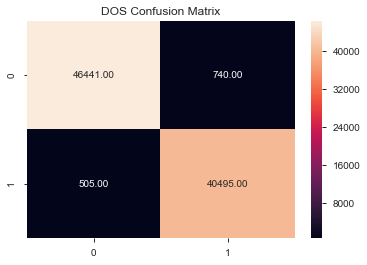

In [229]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt = '0.2f')
plt.title('DOS Confusion Matrix')
plt.show()

In [230]:
metrics.accuracy_score(DOS_test_pred.actual, DOS_test_pred.predicted)

0.9858813123008358

In [231]:
metrics.roc_auc_score(DOS_test_pred.actual, DOS_test_pred.predicted)

0.9859993235702053

## <font color=#aaiihh>$2.2: Probe-Attack$</font>

In [233]:
Binary_train.shape

(125973, 31)

In [256]:
Probe = pd.DataFrame(np.where(train['attack'] == 'satan',1,
                np.where(train['attack'] == 'ipsweep',1,
                np.where(train['attack'] == 'nmap',1,
                np.where(train['attack'] == 'portsweep',1,
                np.where(train['attack'] == 'mscan',1,
                np.where(train['attack'] == 'saint',1,0)))))))

In [257]:
Probe.columns=['Probe']

In [258]:
Probe_data = Binary_train[Binary_train.columns.difference(['Binary_attack'])]
Probe_data.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,serror_rate,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment
0,2,0.00,150,0.03,0.05,0.17,0.17,0.00,25,0.00,...,0.0,0,0,0,0,0,0.00,0.0,0.0,0
1,13,0.15,255,0.60,0.00,0.88,0.00,0.00,1,0.00,...,0.0,0,0,0,0,0,0.00,0.0,0.0,0
2,123,0.07,255,0.05,0.00,0.00,0.10,1.00,26,0.00,...,1.0,0,0,0,0,1,0.00,0.0,1.0,0
3,5,0.00,30,0.00,0.00,0.03,1.00,0.03,255,0.04,...,0.2,0,0,0,1,0,0.00,0.0,0.2,0
4,30,0.00,255,0.00,0.00,0.00,1.00,0.00,255,0.00,...,0.0,0,0,0,1,0,0.09,0.0,0.0,0


In [259]:
Probe_data = pd.concat([Probe_data, Probe], axis=1)
Probe_data.sample(5)

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment,Probe
98178,12,0.00,255,0.00,0.00,0.00,1.00,0.00,255,0.00,...,0,0,0,1,0,0.00,0.00,0.00,0,0
115724,3,0.00,86,0.00,0.01,0.01,1.00,0.00,255,0.01,...,0,0,0,1,0,0.22,0.04,0.04,0,0
57687,103,0.07,255,0.07,0.00,0.00,0.01,1.00,2,0.00,...,0,0,0,0,0,0.00,0.00,1.00,0,0
79279,1,0.00,119,0.04,0.00,0.01,0.09,0.03,11,0.00,...,0,0,0,0,0,0.00,0.00,0.00,0,0
16097,1,0.00,1,0.00,0.00,1.00,1.00,0.00,255,0.25,...,0,1,0,0,0,1.00,0.00,0.00,0,1


In [261]:
train_X, test_X, train_y, test_y = train_test_split(Probe_data[features],
                                                   Probe_data['Probe'],
                                                   test_size=0.2,
                                                   random_state = 0)

In [262]:
print('train_X: ', len(train_X))
print('test_X: ', len(test_X))
print('train_y: ',len(train_y))
print('test_y: ',len(test_y))

train_X:  100778
test_X:  25195
train_y:  100778
test_y:  25195


In [264]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [265]:
Probe_train_pred = pd.DataFrame({'actual': train_y,
                                 'predicted':logreg.predict(train_X)})
Probe_train_pred.head()

,actual,predicted
3048,0,0
40123,0,0
56919,0,0
86610,0,0
39363,0,0


In [266]:
metrics.accuracy_score(Probe_train_pred.actual, Probe_train_pred.predicted)

0.9906626446248189

In [267]:
metrics.roc_auc_score(Probe_train_pred.actual, Probe_train_pred.predicted)

0.9707479012782804

## <font color=#aaiihh>$2.3: R2L-Attack$</font>

In [276]:
R2L = Probe_data[Probe_data.columns.difference(['Probe'])]
R2L.sample(10)

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,serror_rate,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment
37258,1,0.00,155,0.69,0.63,0.69,0.01,0.04,1,0.00,...,0.0,0,0,0,0,0,0.00,0.0,0.0,0
32509,8,0.00,255,0.00,0.00,0.00,1.00,0.00,255,0.00,...,0.0,0,0,0,1,0,0.20,0.0,0.0,0
81205,3,0.00,83,0.00,0.17,0.01,1.00,0.00,83,0.00,...,0.0,0,0,0,1,0,0.00,0.0,0.0,0
61424,211,0.06,255,0.06,0.00,0.00,0.03,1.00,7,0.00,...,1.0,0,0,0,0,1,0.00,0.0,1.0,0
109183,288,0.06,255,0.07,0.00,0.00,0.05,1.00,12,0.00,...,1.0,0,0,0,0,1,0.00,0.0,1.0,0
117339,313,0.01,255,0.01,0.00,0.00,0.89,0.00,227,0.00,...,0.0,1,0,0,0,0,0.00,0.0,0.0,0
82863,237,0.06,255,0.07,0.00,0.00,0.04,1.00,9,0.00,...,1.0,0,0,0,0,1,0.00,0.0,1.0,0
94448,114,0.02,255,0.01,0.00,0.00,1.00,0.00,254,0.00,...,0.0,1,0,0,0,0,0.01,0.0,0.0,0
112033,195,0.00,255,0.01,0.00,0.76,0.76,0.00,195,0.00,...,0.0,0,0,1,0,0,0.00,0.0,0.0,0
2438,10,0.00,140,0.00,0.00,0.01,1.00,0.00,255,0.01,...,0.0,0,0,0,1,0,0.00,0.0,0.0,0


In [277]:
r2l = pd.DataFrame(np.where(train['attack'] == 'guess_password',1,
                           np.where(train['attack'] == 'ftp_write',1,
                                   np.where(train['attack'] == 'imap',1,
                                    np.where(train['attack'] == 'phf',1,
                                    np.where(train['attack'] == 'multihop',1,
                                    np.where(train['attack'] == 'warezmaster',1,
                                    np.where(train['attack'] == 'warezclient',1,
                                    np.where(train['attack'] == 'spy',1,
                                    np.where(train['attack'] == 'xlock',1,
                                    np.where(train['attack'] == 'xsnoop',1,
                                    np.where(train['attack'] == 'snmpguess',1,
                                    np.where(train['attack'] == 'snmpgetattack',1,
                                    np.where(train['attack'] == 'httptunnel',1,
                                    np.where(train['attack'] == 'sendmail',1,
                                    np.where(train['attack'] == 'named',1,0))))))))))))))))
r2l.columns = ['R2L']

In [278]:
R2L_data = pd.concat([R2L,r2l],axis=1)
R2L_data.sample(5)

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment,R2L
115024,11,0.00,155,0.02,0.0,0.36,0.36,0.0,80,0.03,...,0,0,0,0,0,0.17,0.0,0.0,0,0
84955,14,0.00,235,0.00,0.0,0.00,1.00,0.0,255,0.01,...,0,0,0,1,0,0.17,0.0,0.0,0,0
21530,41,0.10,255,0.02,0.0,0.02,0.24,1.0,61,0.00,...,0,0,0,0,0,0.00,0.0,1.0,0,0
99865,181,0.00,106,0.03,0.0,0.01,0.63,0.0,67,0.00,...,1,0,0,0,0,0.00,0.0,0.0,0,0
9009,140,0.07,255,0.07,1.0,0.00,0.04,0.0,10,0.00,...,0,0,0,0,0,0.00,1.0,0.0,0,0


In [299]:
train_X, test_X, train_y, test_y = train_test_split(R2L_data[features],
                                                   R2L_data['R2L'],
                                                   test_size=0.2,
                                                   random_state = 0)

In [300]:
print('train_X: ', len(train_X))
print('test_X: ', len(test_X))
print('train_y: ',len(train_y))
print('test_y: ',len(test_y))

train_X:  100778
test_X:  25195
train_y:  100778
test_y:  25195


In [301]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [302]:
R2L_train_pred = pd.DataFrame({'actual': train_y,
                               'predicted':logreg.predict(train_X)})
R2L_train_pred.sample(5)

,actual,predicted
123359,0,0
121521,0,0
86504,0,0
33133,0,0
87030,0,0


In [303]:
metrics.accuracy_score(R2L_train_pred.actual, R2L_train_pred.predicted)

0.998094822282641

In [304]:
metrics.roc_auc_score(R2L_train_pred.actual, R2L_train_pred.predicted)

0.9333139623159415

## <font color=#aaiihh>$2.4: U2R-Attack$</font>

In [290]:
u2r = pd.DataFrame(np.where(train['attack'] == 'buffer_overflow',1,
                    np.where(train['attack'] == 'loadmodule',1,
                    np.where(train['attack'] == 'rootkit',1,
                    np.where(train['attack'] == 'perl',1,
                    np.where(train['attack'] == 'sqattack',1,
                    np.where(train['attack'] == 'xterm',1,
                    np.where(train['attack'] == 'ps',1,0))))))))
u2r.columns = ['U2R']

In [291]:
U2R_data = pd.concat([U2R, u2r], axis=1)
U2R_data.sample(10)

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,wrong_fragment,U2R
54353,215,0.07,255,0.07,1.0,0.00,0.09,0.0,24,0.00,...,0,0,0,0,0,0.0,1.0,0.0,0,0
16086,1,0.00,51,0.00,1.0,0.02,1.00,0.0,255,0.13,...,0,0,0,1,0,0.0,1.0,0.0,0,0
100371,6,0.00,6,0.00,0.0,0.17,1.00,0.0,255,0.09,...,0,0,0,1,0,0.0,0.0,0.0,0,0
73755,2,0.00,255,0.50,1.0,1.00,0.01,0.0,2,0.00,...,0,0,0,0,1,0.0,1.0,0.0,0,0
33592,111,0.07,255,0.08,0.0,0.00,0.02,1.0,4,0.00,...,0,0,0,0,0,0.0,0.0,1.0,0,0
91967,5,0.00,5,0.00,0.0,0.20,1.00,0.0,255,0.07,...,0,0,0,1,0,0.0,0.0,0.0,0,0
111735,1,0.00,195,0.03,0.0,0.19,0.19,0.0,38,0.00,...,0,0,0,0,0,0.0,0.0,0.0,0,0
65393,2,1.00,180,0.04,0.0,0.01,0.02,0.0,6,0.33,...,0,0,0,0,0,0.0,0.0,0.0,0,0
69765,119,0.07,255,0.07,1.0,0.00,0.05,0.0,14,0.00,...,0,0,0,0,0,0.0,1.0,0.0,0,0
65053,18,0.00,255,0.00,0.0,0.00,1.00,0.0,255,0.00,...,0,0,0,1,0,0.0,0.0,0.0,0,0


In [305]:
train_X, test_X, train_y, test_y = train_test_split(U2R_data[features],
                                                   U2R_data['U2R'],
                                                   test_size=0.2,
                                                   random_state = 0)

In [306]:
print('train_X: ', len(train_X))
print('test_X: ', len(test_X))
print('train_y: ',len(train_y))
print('test_y: ',len(test_y))

train_X:  100778
test_X:  25195
train_y:  100778
test_y:  25195


In [307]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [309]:
U2R_train_pred = pd.DataFrame({'actual':train_y,
                               'predicted':logreg.predict(train_X)})
U2R_train_pred.sample(5)

,actual,predicted
48002,0,0
48073,0,0
115050,0,0
95894,0,0
37467,0,0


In [310]:
metrics.accuracy_score(U2R_train_pred.actual, U2R_train_pred.predicted)

0.9998114667883864

In [311]:
metrics.roc_auc_score(U2R_train_pred.actual, U2R_train_pred.predicted)

0.7567517935342356

# <font color=red>Conclusion: </font><font color=grey><h4>In both cases Either in <font color=blue>Binomial or Multinomial Network Detection</font> cases our accuracy is more then 80% <br> Hence, Our model is good </h4></font>

# The research in the intrusion detection field has been successfully detected the novel attacks, and they secure their network far better then previous security.